In [1]:
import numpy as np
import casadi as ca
import matplotlib.pyplot as plt
import Simulation_wells as sw

Integrador:

In [46]:


par_values = [
    0.2,     # wgl1
    0.7,     # wgl2
    0.60,     # u1
    1,     # u2
    0.01,     # GOR1
    0.1     # GOR2
]

# --- Condições Iniciais [m_ga1, m_ga2, m_gt1, m_gt2, m_ot1, m_ot2, m_gr, m_or] ---
y0 = [2000, 2000, 1000, 1500,
                           3500, 3500, 117.97660766, 795.94318092]

# --- Configuração do Tempo ---
t0 = 0
tf = 40000  # Tempo final [s]
dt = 5      # Passo de tempo [s]
t = np.arange(t0, tf, dt)

# --- Configuração do Integrador CasADi ---
x_sym = ca.SX.sym('x', 8)  # Vetor de 8 estados
par_sym = ca.SX.sym('par', 6) # Vetor de 6 parâmetros

# Define a expressão da EDO
dx_sym = sw.fun(0, x_sym, par_sym)

#Cria o integrador
dae = {'x': x_sym, 'p': par_sym, 'ode': dx_sym}
opts = {'tf': dt}
integrator = ca.integrator('integrator', 'rk', dae, opts)


x_current = np.array(y0)
results = {key: [] for key in sw.modelo(y0, par_values).keys()}
mga1_values= [] #0
mgt1_values = [] #2
mot1_values = []#4
mor_values = []#7


for ti in t:

    res = integrator(x0=x_current, p=par_values)
    x_next = res['xf'].full().flatten()

    model_output = sw.modelo(x_next, par_values)
    
    for key in results:
        results[key].append(float(model_output[key]))
    
    x_current = x_next
    mga1_values.append(x_next[0])
    mgt1_values.append(x_next[2])
    mot1_values.append(x_next[4])
    mor_values.append(x_next[7])
for key in results:
    results[key] = np.array(results[key])


#

Gráfico Dinamico

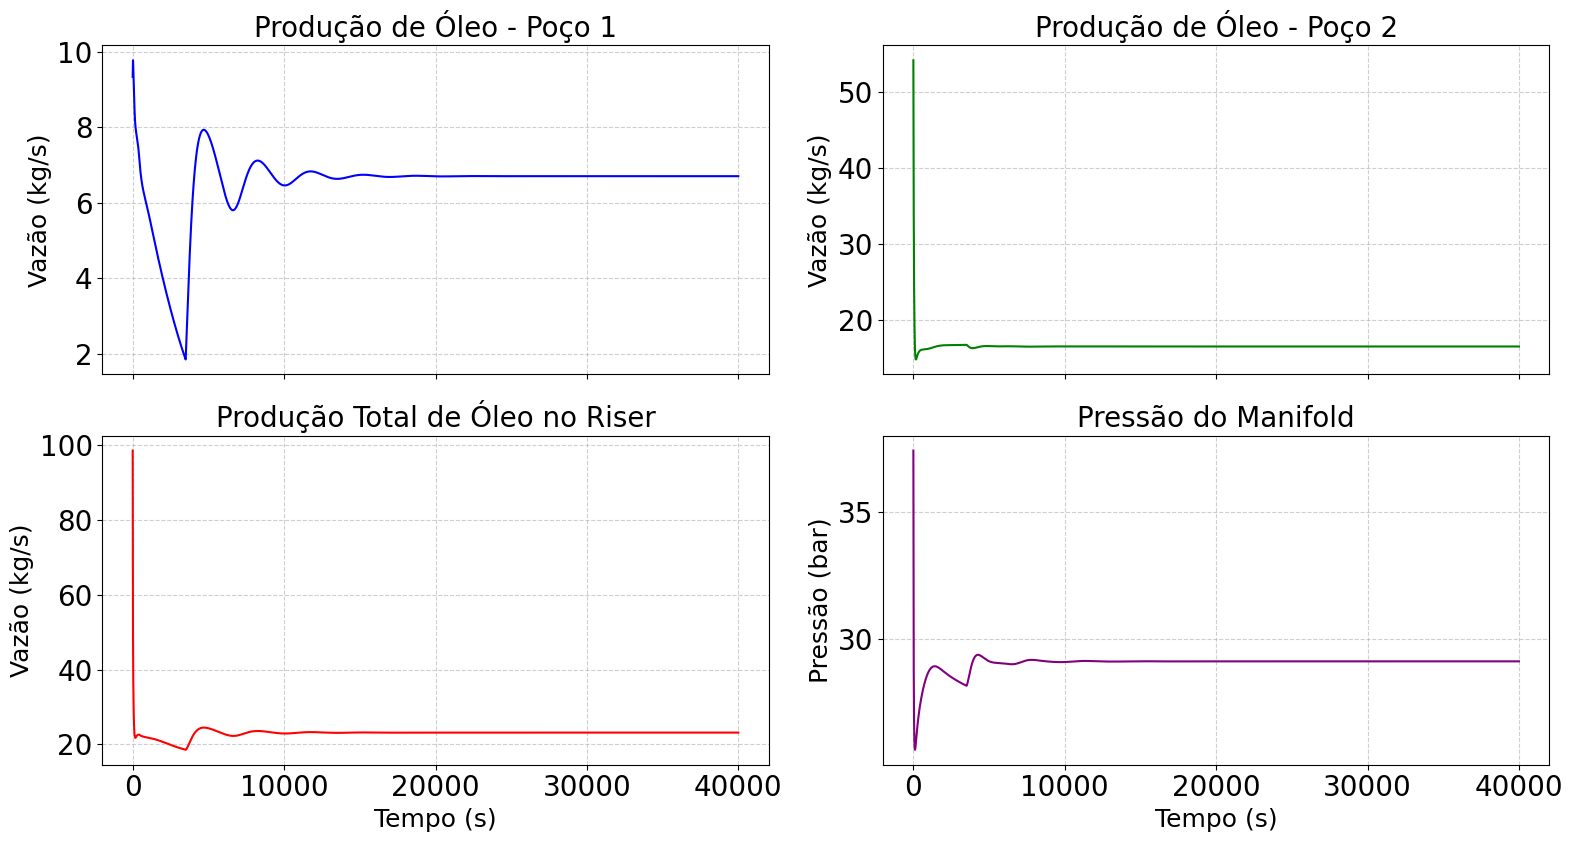

In [47]:
plt.rcParams.update({
    'font.size': 14,             # Tamanho geral da fonte
    'axes.labelsize': 18,        # Tamanho dos rótulos dos eixos (X e Y)
    'axes.titlesize': 20,        # Tamanho dos títulos dos subplots
    'xtick.labelsize': 20,       # Tamanho dos números no eixo X
    'ytick.labelsize': 20,       # Tamanho dos números no eixo Y
    'figure.titlesize': 24       # Tamanho do título principal da figura
})


fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True)
axs = axs.flatten()
#fig.suptitle('Análise Dinâmica da Simulação', fontsize=22, weight='bold')

# --- Plot 1: Produção de Óleo Poço 1 ---
axs[0].plot(t, results['wpo1'], color='blue')
axs[0].set_title('Produção de Óleo - Poço 1')
axs[0].set_ylabel('Vazão (kg/s)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot 2: Produção de Óleo Poço 2 ---
axs[1].plot(t, results['wpo2'], color='green')
axs[1].set_title('Produção de Óleo - Poço 2')
axs[1].set_ylabel('Vazão (kg/s)')
axs[1].grid(True, linestyle='--', alpha=0.6)

# --- Plot 3: Produção Total de Óleo no Riser ---
axs[2].plot(t, results['wto_riser'], color='red')
axs[2].set_title('Produção Total de Óleo no Riser')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Vazão (kg/s)')
axs[2].grid(True, linestyle='--', alpha=0.6)

# --- Plot 4: Pressão do Manifold ---
axs[3].plot(t, results['Pm'] / 1e5, color='purple') # Convertendo Pa para bar
axs[3].set_title('Pressão do Manifold')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Pressão (bar)')
axs[3].grid(True, linestyle='--', alpha=0.6)

# --- Ajustes Finais e Salvamento ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# --- MUDANÇA AQUI: dpi=300 ---
#output_filename = "grafico_simulacao_300dpi.png"
#plt.savefig(output_filename, dpi=300)
#print(f"\nGráfico salvo em alta resolução como '{output_filename}'")

plt.show()

[np.float64(715.38040043334), np.float64(577.4494421526622), np.float64(500.1309687196997), np.float64(460.1573379911939), np.float64(438.94542723791074), np.float64(427.2483321898151), np.float64(420.87611694936777), np.float64(417.81473684337453), np.float64(416.75086972470143), np.float64(417.04170326377556), np.float64(418.35277363201504), np.float64(420.4759282545178), np.float64(423.26321263799207), np.float64(426.60010841921087), np.float64(430.3933566971397), np.float64(434.56478903784557), np.float64(439.047848645205), np.float64(443.7854067882347), np.float64(448.7282501985251), np.float64(453.8339448525024), np.float64(459.0659298057159), np.float64(464.3927642755252), np.float64(469.78748508896956), np.float64(475.2270488572447), np.float64(480.69184243072164), np.float64(486.16525037228837), np.float64(491.63327129989904), np.float64(497.0841769365232), np.float64(502.5082090373444), np.float64(507.8973102827568), np.float64(513.2448858660592), np.float64(518.5455929499802

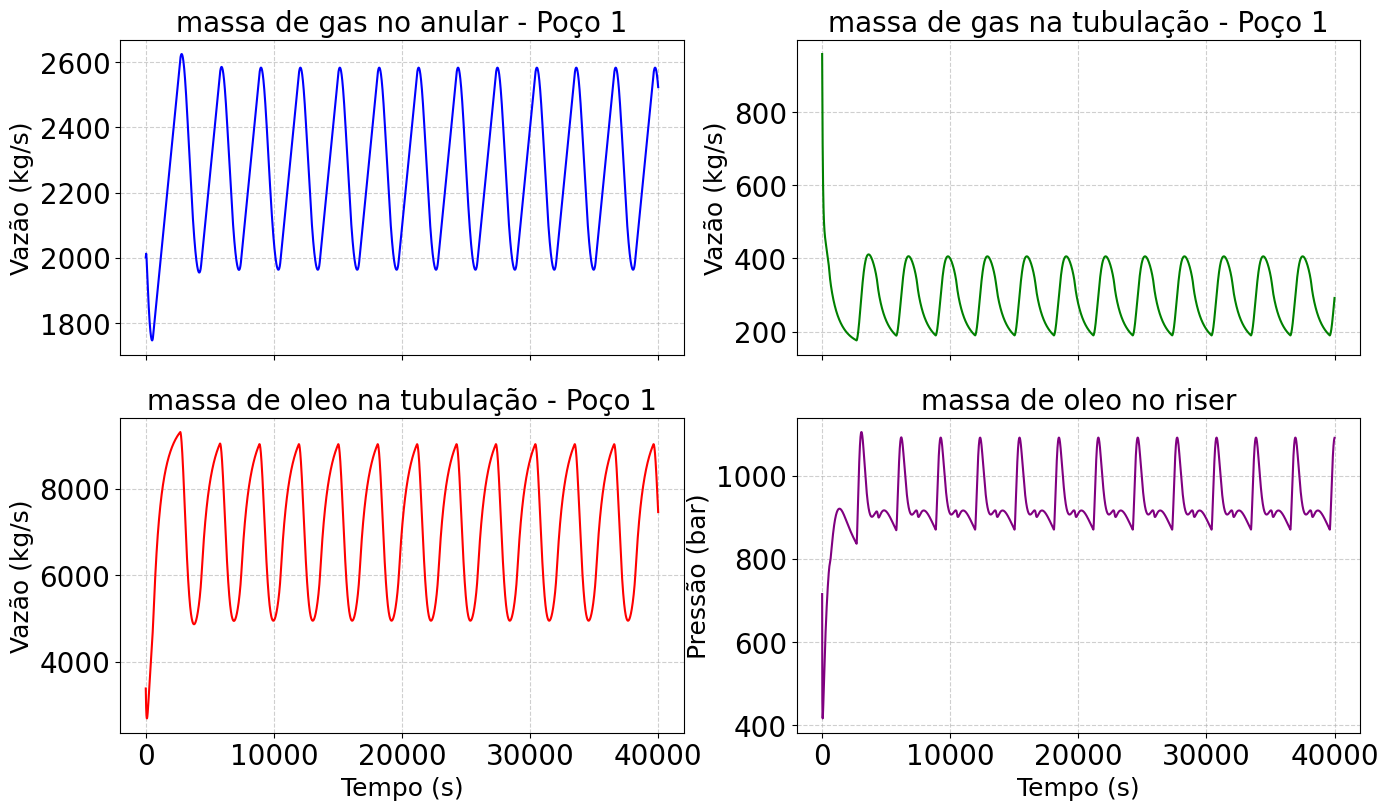

In [45]:
plt.rcParams.update({
    'font.size': 14,             # Tamanho geral da fonte
    'axes.labelsize': 18,        # Tamanho dos rótulos dos eixos (X e Y)
    'axes.titlesize': 20,        # Tamanho dos títulos dos subplots
    'xtick.labelsize': 20,       # Tamanho dos números no eixo X
    'ytick.labelsize': 20,       # Tamanho dos números no eixo Y
    'figure.titlesize': 24       # Tamanho do título principal da figura
})


fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True)
axs = axs.flatten()
#fig.suptitle('Análise Dinâmica da Simulação', fontsize=22, weight='bold')

# --- Plot 1: Produção de Óleo Poço 1 ---
axs[0].plot(t,  mga1_values, color='blue')
axs[0].set_title('massa de gas no anular - Poço 1')
axs[0].set_ylabel('Vazão (kg/s)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot 2: Produção de Óleo Poço 2 ---
axs[1].plot(t, mgt1_values, color='green')
axs[1].set_title('massa de gas na tubulação - Poço 1')
axs[1].set_ylabel('Vazão (kg/s)')
axs[1].grid(True, linestyle='--', alpha=0.6)

# --- Plot 3: Produção Total de Óleo no Riser ---
axs[2].plot(t, mot1_values, color='red')
axs[2].set_title('massa de oleo na tubulação - Poço 1')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Vazão (kg/s)')
axs[2].grid(True, linestyle='--', alpha=0.6)

# --- Plot 4: Pressão do Manifold ---
axs[3].plot(t, mor_values , color='purple') # Convertendo Pa para bar
axs[3].set_title('massa de oleo no riser')
axs[3].set_xlabel('Tempo (s)')
axs[3].set_ylabel('Pressão (bar)')
axs[3].grid(True, linestyle='--', alpha=0.6)

print(mor_values)